# TECH 2 mandatory assignment - Part B

Write your solution for Part B in this notebook.

In [1]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
from part_A import std_builtin, std_numpy, std_loops

# Read the csv file with pandas, but the first line is already data so name columns 0, 1, 2
data = pd.read_csv('data.csv', header=None, names=[0, 1, 2])
df = pd.DataFrame(data)


# Calculate standard deviation of each column
std_dev = df.std()

# Seperate columns into 3 lists and remove NaN values
nest = [df[i].tolist() for i in df.columns]

# Handle NaN values for each column
nest = [[x for x in i if str(x) != 'nan'] for i in nest]


All methods calculate the same standard deviation: True
Standard deviation with loops:1.4142135623730951
Standard deviation with built-in functions:1.4142135623730951
Standard deviation with numpy:1.4142135623730951


### Section A - List of 100 numbers

In [2]:
# Time taken with loops
%timeit std_loops(nest[0])

7.76 μs ± 249 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [3]:
# Time taken with builtin functions
%timeit std_builtin(nest[0])

7.94 μs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
# Time taken with numpy
%timeit std_numpy(nest[0])

9.85 μs ± 885 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Section B - List of 1000 numbers

In [5]:
# Time taken with loops
%timeit std_loops(nest[1])

78.6 μs ± 1.58 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
# Time taken with builtin functions
%timeit std_builtin(nest[1])

75.9 μs ± 2.79 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
# Time taken with numpy
%timeit std_numpy(nest[1])

29 μs ± 307 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Section C - List of 10000 numbers

In [8]:
# Time taken with loops
%timeit std_loops(nest[2])

788 μs ± 3.98 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
# Time taken with builtin functions
%timeit std_builtin(nest[2])

738 μs ± 14.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
# Time taken with numpy
%timeit std_numpy(nest[2])

240 μs ± 16.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# **Findings and summary**

### 2.1 Hypothesis: numpy.std() will result in lower runtimes over longer arrays while offering little to benefits for small datasets
While using built-in functions may result in slightly lower times over loops - using numpy will result in significantly lower times over long arrays due to optimisation principles and vectorisation compared to both other approaches.

In [11]:
# Measure runtimes and add into a dataframe
runtime_data = pd.DataFrame(columns=['loops', 'builtin', 'numpy'])
# Rows are the number of elements in the list
runtime_data.loc['100'] = [timeit.timeit(lambda: std_loops(nest[0]), number=100), timeit.timeit(lambda: std_builtin(nest[0]), number=100), timeit.timeit(lambda: std_numpy(nest[0]), number=100)]
runtime_data.loc['1000'] = [timeit.timeit(lambda: std_loops(nest[1]), number=100), timeit.timeit(lambda: std_builtin(nest[1]), number=100), timeit.timeit(lambda: std_numpy(nest[1]), number=100)]
runtime_data.loc['10000'] = [timeit.timeit(lambda: std_loops(nest[2]), number=100), timeit.timeit(lambda: std_builtin(nest[2]), number=100), timeit.timeit(lambda: std_numpy(nest[2]), number=100)]

#### 2.2 Visualising the data for each approach and array scale

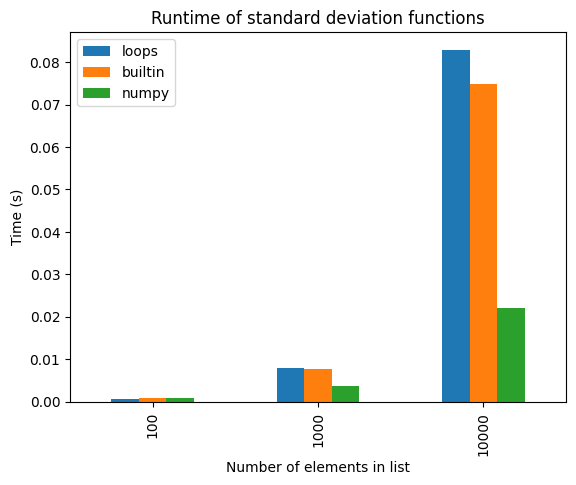

In [12]:
# Plot the runtimes
runtime_data.plot(kind='bar')
plt.ylabel('Time (s)')
plt.xlabel('Number of elements in list')
plt.title('Runtime of standard deviation functions')
plt.show()

### 2.3 **Conclusion**
##### The data shows that numpy will be significantly faster over large data samples while it might be outperformed by both other methods on small array lengths. Although numpy will outperform both approaches with vectorisation over large arrays the overhead time of initialisation will be larger than the gains from its optimised methods. Using python's built-in function are generally slightly faster than using only *for* loops.
Therefore:
- Use built-in functions for small datasets
- Use numpy methods for mid- and large-sized datasets